<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
## openEO Platform - Corine Land Cover Change over an alpine region

In [10]:
import openeo
from openeo.rest.datacube import THIS
openeo.client_version()

'0.10.1'

## Connect to openEO

Via EGI Check-in using the aggregator

In [2]:
openeo_aggregator = "openeo.cloud"
conn = openeo.connect(openeo_aggregator)
conn = conn.authenticate_oidc()

To authenticate: visit https://aai.egi.eu/oidc/device and enter the user code 'cNH7JP'.
Authorized successfully.
Authenticated using device code flow.


In [2]:
# Describe account and list collections if needed
# conn.describe_account()['user_id']
# conn.list_collections()


#### Have a look at the CORINE LAND COVER collection

In [111]:
conn.describe_collection("corine_land_cover")

{'cube:dimensions': {'bands': {'type': 'bands', 'values': ['CLC']},
  't': {'extent': [['2000-12-15T00:00:00', '2018-12-15T00:00:00']],
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [1400000.0, 7900000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [100000.0, 4500000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'}},
 'description': 'The CORINE Land Cover (CLC) inventory began in 1985, consisting of 44 land cover classes. This collection is resampled and stored at a 10m x 10m resolution. For further information on CORINE land cover see [here](https://land.copernicus.eu/pan-european/corine-land-cover)',
 'extent': {'spatial': {'bbox': [[-32.091997820189285,
     31.6977150076753,
     55.116146716432254,
     72.11413813793037]]},
  'temporal': {'interval': [['2000-12-15T00:00:00Z',
     '2018-12-15T00:00:00Z']]}},
 'id': 'corine_land_cover',
 'item_assets': {},
 'keywords': ['EODC', 'Copernicus', 'ARD', 'Level-3'],
 'license': 'proprietary',
 'links': [{'href': 'https://openeo.eodc.eu/v1.0', 'rel': 'root'},
  {'href': 'https://openeo.eodc.eu/v1.0/collections', 'rel': 'parent'},
  {'href': 'https://openeo.eodc.eu/v1.0/collections/corine_land_cover',
   'rel': 'self'},
  {'href': 'https://openeo.eodc.eu/v1.0/collections/corine_land_cover/items',
   'rel': 'items'}],
 'properties': {},
 'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.0.0/schema.json',
  'https://stac-extensions.github.io/item-assets/v1.0.0/schema.json',
  'https://github.com/stac-extensions/eo'],
 'stac_version': '1.0.0',
 'summaries': {'constellation': {},
  'eo:bands': [{'common_name': 'band1', 'name': 'CLC'}],
  'odc:file_format': {'0': 'GeoTIFF'},
  'odc:product_family': {'0': 'level2'},
  'platform': {}},
 'title': 'CORINE Land Cover',
 'type': 'Collection'}

<img src="CorineLandClasses.png"
     width=500px
     alt="CLC" />

In [34]:
from eo_utils import openeoMap
center = [47.1, 12.84]
zoom = 11

eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[47.1, 12.84], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [35]:
from openeo.util import to_bbox_dict
bbox = eoMap.getBbox()
spatial_extent = to_bbox_dict(bbox) 
print(spatial_extent)

{'west': 12.547760009765627, 'south': 47.00647991252098, 'east': 13.132781982421875, 'north': 47.19344533938292}


In [42]:
spatial_extent = {'west': 11.716845, 'south': 41.685049, 'east': 13.112587, 'north': 42.336046} 

Load the data

In [43]:
collection = 'corine_land_cover'
corine_data = conn.load_collection(
    collection, 
    spatial_extent=spatial_extent, 
    temporal_extent=["2000-01-01", "2019-04-30"],
    bands=["CLC"], 
)

The land cover class 34 is the "Glaciers and perpetual snow".

Look at where the data is equal to 34

In [44]:
corine_eq_34 = corine_data.process("eq",{"x":THIS,"y": 34})

In [45]:
corine_2000 = corine_eq_34.filter_temporal(extent=["2000-01-01", "2001-01-01"])
corine_2018 = corine_eq_34.filter_temporal(extent=["2018-01-01", "2019-01-01"])

In [46]:
corine_merged = corine_2000.merge_cubes(corine_2018)

In [47]:
corine_merged_saved = corine_merged.save_result("NetCDF")

In [48]:
corine_merged_saved.flat_graph()

{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'bands': ['CLC'],
   'id': 'corine_land_cover',
   'spatial_extent': {'west': 11.716845,
    'south': 41.685049,
    'east': 13.112587,
    'north': 42.336046},
   'temporal_extent': ['2000-01-01', '2019-04-30']}},
 'eq1': {'process_id': 'eq',
  'arguments': {'x': {'from_node': 'loadcollection1'}, 'y': 34}},
 'filtertemporal1': {'process_id': 'filter_temporal',
  'arguments': {'data': {'from_node': 'eq1'},
   'extent': ['2000-01-01', '2001-01-01']}},
 'filtertemporal2': {'process_id': 'filter_temporal',
  'arguments': {'data': {'from_node': 'eq1'},
   'extent': ['2018-01-01', '2019-01-01']}},
 'mergecubes1': {'process_id': 'merge_cubes',
  'arguments': {'cube1': {'from_node': 'filtertemporal1'},
   'cube2': {'from_node': 'filtertemporal2'}}},
 'saveresult1': {'process_id': 'save_result',
  'arguments': {'data': {'from_node': 'mergecubes1'},
   'format': 'NetCDF',
   'options': {}},
  'result': True}}

Create and start a job

In [49]:
job = corine_merged_saved.create_job(title = "CORINE_LAND_COVER")
print(f"Batch job with id {job.job_id} has status  {job.status()}")

Batch job with id eodc-jb-2e8e04b5-84c6-4512-aca9-d61a6baae5ea has status  created


In [50]:
job.start_job()
print(f"Batch job with id {job.job_id} has status  {job.status()}")

Batch job with id eodc-jb-2e8e04b5-84c6-4512-aca9-d61a6baae5ea has status  running


In [54]:
print(f"Batch job with id {job.job_id} has status  {job.status()}")

Batch job with id eodc-jb-2e8e04b5-84c6-4512-aca9-d61a6baae5ea has status  finished


In [110]:
results = job.get_results()
metadata = results.get_metadata()
results.download_files("./demo_data/")

[PosixPath('demo_data/out_2000_12_15T00_00_00_EU010M_E048N009T1'),
 PosixPath('demo_data/out_2000_12_15T00_00_00_EU010M_E048N010T1'),
 PosixPath('demo_data/out_2000_12_15T00_00_00_EU010M_E049N009T1'),
 PosixPath('demo_data/out_2000_12_15T00_00_00_EU010M_E049N010T1'),
 PosixPath('demo_data/out_2018_12_15T00_00_00_EU010M_E048N009T1'),
 PosixPath('demo_data/out_2018_12_15T00_00_00_EU010M_E048N010T1'),
 PosixPath('demo_data/out_2018_12_15T00_00_00_EU010M_E049N009T1'),
 PosixPath('demo_data/out_2018_12_15T00_00_00_EU010M_E049N010T1'),
 PosixPath('demo_data/job-results.json')]

Open the downloaded data and have a look at it

In [104]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

CLC_2000 = xr.open_dataset("./demo_data/out_2000_12_15T00_00_00_EU010M_E049N015T1")
CLC_2018 = xr.open_dataset("./demo_data/out_2018_12_15T00_00_00_EU010M_E049N015T1")
CLC_2018

<xarray.Dataset>
Dimensions:      (y: 2735, x: 3179)
Coordinates:
    t            datetime64[ns] ...
  * y            (y) float64 1.543e+06 1.543e+06 ... 1.516e+06 1.516e+06
  * x            (x) float64 4.968e+06 4.968e+06 4.968e+06 ... 5e+06 5e+06 5e+06
    spatial_ref  int32 ...
Data variables:
    CLC          (y, x) float64 ...
Attributes:
    crs:                PROJCRS["Azimuthal_Equidistant",BASEGEOGCRS["WGS 84",...
    nodata:             -9999
    collection:         corine_land_cover
    datetime_from_dim:  2022-06-27 10:34:53.864849

In [105]:
CLC_2000 = CLC_2000.CLC.values
CLC_2018 = CLC_2018.CLC.values

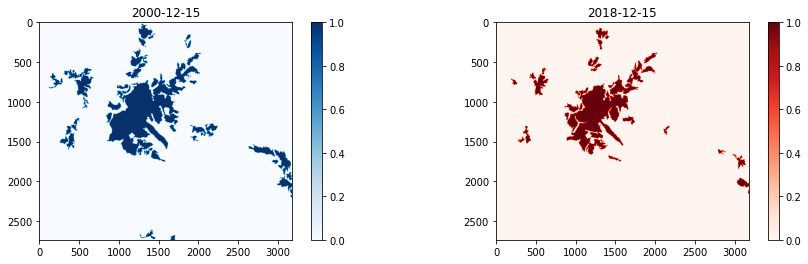

In [106]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.title("2000-12-15")
plt.imshow(CLC_2000, cmap = "Blues")   
plt.colorbar()

plt.subplot(1,2,2)
plt.title("2018-12-15")
plt.imshow(CLC_2018, cmap = "Reds")   
plt.colorbar()

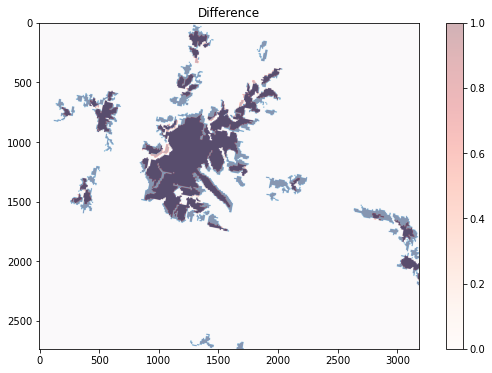

In [107]:
plt.figure(figsize=(10,6))
plt.title("Difference")
plt.imshow(CLC_2000, cmap="Blues", alpha=0.7)
plt.imshow(CLC_2018, cmap="Reds", alpha=0.3)
plt.colorbar()

Count the Glaciers and perpetual snow pixels.

In [108]:
counts00 = np.sum(CLC_2000)
counts18 = np.sum(CLC_2018)

In [109]:
class_table = pd.DataFrame({'year': [2000, 2018], 'Glaciers and perpetual snow': [counts00, counts18]})
class_table

,year,Glaciers and perpetual snow
0,2000,830803.0
1,2018,528078.0
